#### Import all the necessary libraries

In [56]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
%matplotlib inline

#### Set default styles

In [57]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (5,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Load dataset using the pandas library

In [58]:
medic_df = pd.read_csv(r'C:\Users\Codex_Jay\Downloads\insurance.csv')
medic_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Inspect the dataset

In [59]:
medic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


medic_df.info() shows that the dataset contains 1338 observations and 7 features. it further contains
2 float datatypes, 2 integars and 3 object datatypes, in total no null count exist in the data.


In [60]:
medic_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The numerical columns displayed with the medic_df.describe() shows the descriptive statistics of the dataset
* Age column has a mean of 39 years, standard deviation of 14, min of 18 years and max of 64 years
* BMI seems to have a mean of 30, stdandard deviation of 6, min of 15.96 and max of 53
* The children column contained 1338 valid entries with the min no of children at 1 and the max up to 5
* The charges column has a mean of 13270 which is absurdly too much, min of 1,121 and a max of 63,770 hidden details will definitely reveal outliers

### Univariate Analysis
* Distribution of Age using Histogram
* Distribution of Body Mass Index
* Distribution of Smokers with Violin Plot
* Distribution of charges by sex

In [61]:
fig = px.histogram(
    medic_df,
    x = 'age',
    marginal = 'box',
    color = 'sex',
    color_discrete_sequence=['black', 'brown'],
    title = 'Distribution of Age',
    hover_data= ['charges'],
    height=600,
    width=600,
    nbins = 47
)
fig.update_layout(bargap = 0.1)
fig.show()

### Inference from the distribution of Ages
* The distribution of ages with 47 equal bins shows a uniform distribution with most age reporting
between 22 - 29 count for each age group
* There seems to be a strange appearance of 69 and 68 count for the ages 18 and 19. It could be deduced that presumably 
most persons amongst the ages 18 and 19 registered their insurance early probably due to some insurance benefit.

In [62]:
fig = px.histogram(
    medic_df,
    x = 'bmi',
    marginal = 'box',
    color_discrete_sequence=['red'],
    height=600,
    width=600,
    title = 'Distribution of Body Mass Index [BMI]'
)
fig.update_layout(bargap = 0.1)
fig.show()

#### Inference from BMI distribution
* Distribution of bmi follows a guassian distribution curve, with most bmi in the normal to overweight range, massive concentration appears around bmi 25 - bmi 35 indicating that the distribution is mostly dominated by individuals in the normal to overweight range.

### Distribution of Charges

In [63]:
fig = px.histogram(
    medic_df,
    x = 'charges',
    marginal = 'box',
    color = 'smoker',
    color_discrete_sequence=['grey','green'],
    hover_data=['age'],
    histnorm=None,
    barmode='overlay',
    nbins=47,
    opacity = 0.6,
    height=600,
    width=600,
    title = 'Distribution of Charges'
)
fig.update_layout(bargap=0.1)
fig.show()

#### Inference from distribution of charges
* Distribution of charges displayed in adding with extra information like smoking status, amongst non-smokers most had their annual charges in the lower bound of under 2k - 15k, smaller portion of the population had charges up to 38k which suggests underlying health issues, accidents, genetic disorders which might have raised the charges. The boxplot reveals the presence of outliers in the distribution of charges which might be as a result of increasing medical charges dues to underlying health challenges.

* With the smoker status turned on, a bimodal distribution could be seen splitting the data distribution into 2 equal parts, this shows 2 distinct group of smokers, young smokers and old smokers. Younger smokers had their annual charges under 30k which adults had their charges up to 64k. Additionally increasing charges could suggest underlying health condition like heart disease, lungs disease in conjuction with smoking which might raise medical charges.

In [64]:
fig = px.violin(
    medic_df[medic_df['smoker'] == 'yes'],
    y = 'charges',
    box = True,
    points='all',
    height=600,
    width=600,
    title='Charges Distribution for Smokers'
)
fig.show()

#### Inference of charges by smokers with violin plot
* The violin plot shows the bimodal split, with the boxplot engulfed, the dots points to each individual charges displayed. The thin section of the violin plot shows the region where the split occured.

In [65]:
fig = px.histogram(
    medic_df,
    x = 'smoker',
    color = 'sex',
    color_discrete_sequence=['green', 'black'],
    height=600,
    width=600,
    title = 'Distribution of Smokers'
)
fig.update_layout(bargap=0.5)
fig.show()

### Inference from the smoker distribution
* From the distribution it is observed that 159 males were reported among smokers and 115 for females,
also among non-smokers 517 reported for males and 547 for females.

#### Bivariate Analysis
* Relationship between Children vs Charges
* Relationship between BMI vs Charges

In [66]:
px.violin(medic_df, x ='children', y = 'charges', title = 'Relationship between Children vs Charges', height=600,
    width=600)


#### Inference
* The violin plot shows the clear distribution of charges based on number of children, this was sufficient for non-continuous variable like no of children that goes from 1 upwards. For every number of children, the top tip shows the equivalent charges although this is not a trend as individuals with higher number of children like 5 seems to have lower charges.

### Relationship between BMI and Charges

In [153]:
fig = px.scatter(
    medic_df,
    x = 'bmi',
    y = 'charges',
    color = 'smoker',
    opacity= 0.7,
    hover_data=['sex'],
    title = 'BMI vs Charges',
    height=700,
    width=700
)
fig.update_traces(marker_size = 5)
fig.show()

### Inference from the relationship betweeen bmi vs charges
* One clear observation from the relationship shows no significant relationship between bmi and charges alone, but a clear
relationship exists between smoker and charges, although smokers with bmi under 30 seems to have charges under 30k
and those with bmi past 30 seems to have increasing charges past 30k up to 60k

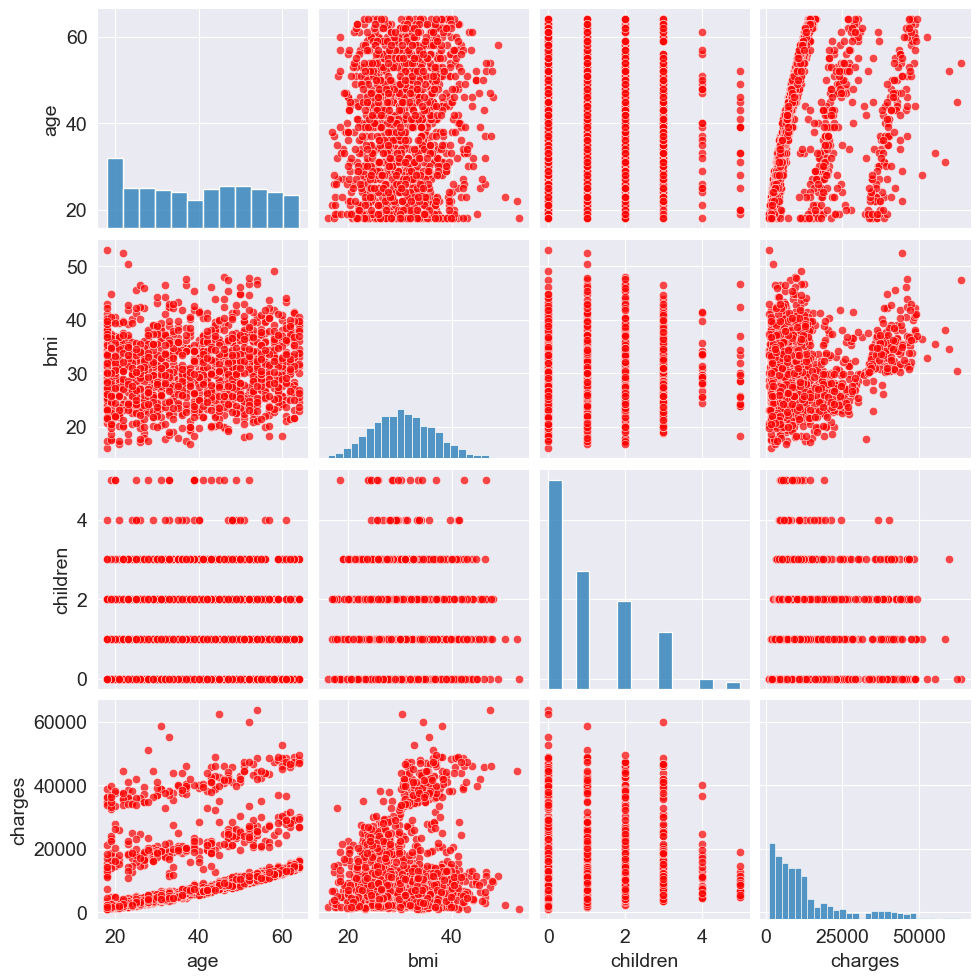

In [68]:
sns.pairplot(data = medic_df, plot_kws={'alpha': 0.7, 'color': 'red'}, markers='o');

In [69]:
medic_df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [70]:
medic_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [71]:
sorted(medic_df['region'].unique())

['northeast', 'northwest', 'southeast', 'southwest']

In [72]:
sorted(medic_df['region'].unique())
region_mapping = {
    'northeast': 1,
    'northwest': 2,
    'southeast': 3,
    'southwest': 4
}
medic_df['region_num'] = medic_df['region'].map(region_mapping)


In [73]:
px.violin(medic_df, x = 'region_num', y = 'charges', height=600,
    width=600)

In [74]:
fig = px.scatter(
    medic_df,
    x = 'age',
    y = 'charges',
    color = 'smoker',
    title = 'Relationship between Charges vs Age',
    height=600,
    width=600,
    opacity = 0.7
)
fig.update_traces(marker_size = 5)
fig.show()

* 3 clear clusters which forms a linear trend as increasing with age, but there is a mix of smoker and non-smoker. This tells that among non smokers most people incur a lower annual charges that goes from 0 - 5k at age 18 and goes up to 13k and 15 at age 64.

### Correlation Coefficients


In [154]:
print(f'Correlation between charges and age: {medic_df.charges.corr(medic_df.age)}')
print(f'Correlation between charges and bmi: {medic_df.charges.corr(medic_df.bmi)}')
print(f'Correlation between charges and children: {medic_df.charges.corr(medic_df.children)}')

Correlation between charges and age: 0.2990081933306478
Correlation between charges and bmi: 0.19834096883362887
Correlation between charges and children: 0.06799822684790487


In [75]:
medic_df.select_dtypes('number').corr()

,age,bmi,children,charges,region_num
age,1.000000,0.109272,0.042469,0.299008,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,0.157566
children,0.042469,0.012759,1.000000,0.067998,0.016569
charges,0.299008,0.198341,0.067998,1.000000,-0.006208
region_num,0.002127,0.157566,0.016569,-0.006208,1.000000


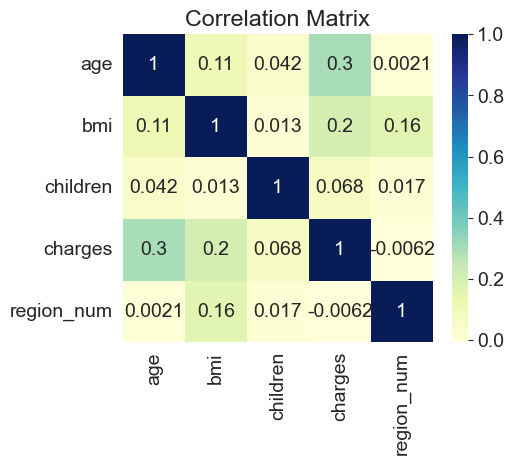

In [76]:
medic_df.select_dtypes('number').corr()
sns.heatmap(medic_df.select_dtypes('number').corr(), cmap = 'YlGnBu', annot = True)
plt.title('Correlation Matrix');

In [77]:
non_smoker_df = medic_df[medic_df['smoker'] == 'no']

In [78]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges,region_num
1,18,male,33.770,1,no,southeast,1725.55230,3
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2
5,31,female,25.740,0,no,southeast,3756.62160,3
...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,4
1333,50,male,30.970,3,no,northwest,10600.54830,2
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,3


In [79]:
def estimate_charge(age, w, b):
    return w * age + b

w = 50
b = 100

ages = non_smoker_df['age']
ages
estimated_charges = estimate_charge(ages, w, b)
estimated_charges


1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [80]:
non_smoker_df['charges']

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

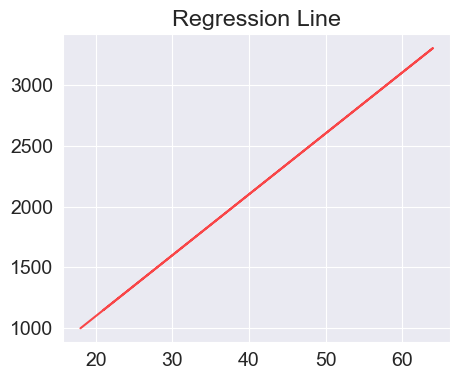

In [81]:
plt.plot(ages, estimated_charges, 'r', alpha = 0.7)
plt.title('Regression Line');

In [82]:
def rmse(target, prediction):
    return np.sqrt(np.mean(np.square(target - prediction)))

RMSE: 4971.5967339993995


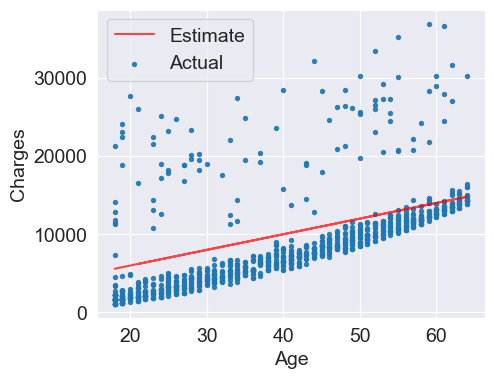

In [83]:
def try_parameters(w,b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']
    estimated = estimate_charge(ages, w, b)
    plt.plot(ages, estimated, 'r', alpha = 0.7)
    plt.scatter(ages, target, s = 8, alpha = 0.9)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    loss = rmse(target, estimated)
    print(f'RMSE: {loss}')
try_parameters(200, 2000)

In [84]:
loss = rmse(non_smoker_df['charges'], estimated_charges)
loss

np.float64(8461.949562575493)

In [85]:
model = LinearRegression()
help(model)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(
 |      *,
 |      fit_intercept=True,
 |      copy_X=True,
 |      tol=1e-06,
 |      n_jobs=None,
 |      positive=False
 |  )
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  tol : float, default=1e-6
 |      The precision of th

In [122]:
feature = ['age']
target = 'charges'
X_train = non_smoker_df[feature]
y_train = non_smoker_df[target]
print(f'Shape of feature matrix: {X_train.shape}')
print(f'Shape of target vector: {y_train.shape}')

Shape of feature matrix: (1064, 1)
Shape of target vector: (1064,)


In [123]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [124]:
predicted_charges = model.predict(X_train)
predicted_charges

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [125]:
model_intercept = model.intercept_
model_coefficient = model.coef_

print(f'Model coefficient: {model_coefficient[0]}')
print(f'Model intercept: {model_intercept}')

Model coefficient: 267.2489128311997
Model intercept: -2091.4205565650864


RMSE: 4662.505766636395


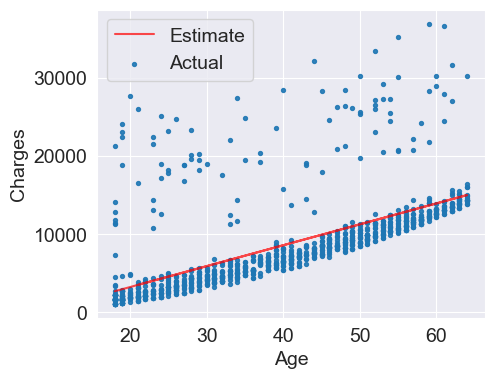

In [126]:
try_parameters(model_coefficient, model_intercept)

#### Building a model with SGDregressor

In [127]:
model_2 = SGDRegressor()
model_2.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [128]:
predicted_charges_2 = model_2.predict(X_train)
predicted_charges_2

array([ 370.5898796 , 3091.47008109, 4451.91018183, ...,  370.5898796 ,
        370.5898796 , 1186.85394004], shape=(1064,))

RMSE: 5175.2829496727545


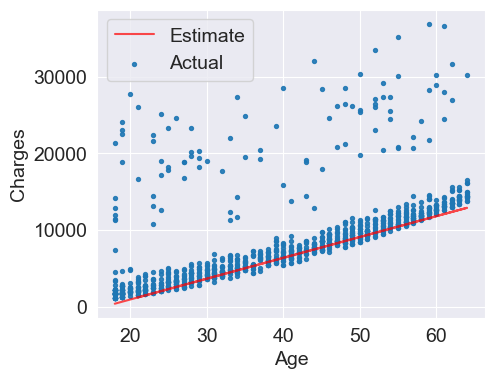

In [129]:
try_parameters(model_2.coef_, model_2.intercept_)

#### Training a model for Age vs Charges with Smokers in mind

In [130]:
medic_df.head()

,age,sex,bmi,children,smoker,region,charges,region_num
0,19,female,27.900,0,yes,southwest,16884.92400,4
1,18,male,33.770,1,no,southeast,1725.55230,3
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,2


In [131]:
smokers_df = medic_df[medic_df['smoker'] == 'yes']
smokers_df.head()

,age,sex,bmi,children,smoker,region,charges,region_num
0,19,female,27.90,0,yes,southwest,16884.9240,4
11,62,female,26.29,0,yes,southeast,27808.7251,3
14,27,male,42.13,0,yes,southeast,39611.7577,3
19,30,male,35.30,0,yes,southwest,36837.4670,4
23,34,female,31.92,1,yes,northeast,37701.8768,1


In [132]:
ages_smokers = smokers_df['age']
ages_smokers

0       19
11      62
14      27
19      30
23      34
        ..
1313    19
1314    30
1321    62
1323    42
1337    61
Name: age, Length: 274, dtype: int64

In [133]:
estimate_charge(ages, 150, 100)

1       2800
2       4300
3       5050
4       4900
5       4750
        ... 
1332    7900
1333    7600
1334    2800
1335    2800
1336    3250
Name: age, Length: 1064, dtype: int64

In [134]:
target_smoker = smokers_df['charges']
target_smoker

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

RMSE Loss: 10916.229549369347


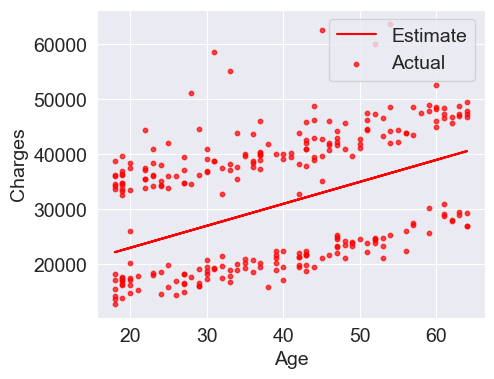

In [152]:
def try_parameters_2(w,b):
    ages = smokers_df['age']
    target = smokers_df['charges']
    estimated_charges_2 = estimate_charge(ages, w, b)
    plt.plot(ages,estimated_charges_2, 'r')
    plt.scatter(ages, target, s = 10, alpha = 0.7, color = 'red')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    loss_2 = rmse(target , estimated_charges_2)
    print(f'RMSE Loss: {loss_2}')
try_parameters_2(400,15000)


In [136]:
feature_3 = ['age']
target_3 = 'charges'
X_train_2 = smokers_df[feature_3]
y_train_2 = smokers_df[target_3]

In [137]:
model_3 = SGDRegressor()

In [138]:
model_3.fit(X_train_2, y_train_2)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [140]:
predicted_charges_3 = model.predict(X_train_2)
predicted_charges_3

array([ 2986.30878723, 14478.01203897,  5124.30008988,  5926.04682837,
        6995.0424797 ,  6193.2957412 ,  3788.05552572,  5391.54900271,
        7262.29139253, 13943.51421331,  7529.54030536, 10736.52725933,
        7529.54030536, 13409.01638764,  2719.0598744 , 12072.77182349,
        3253.55770006,  5391.54900271,  5124.30008988,  3788.05552572,
        7796.78921819,  9934.78052084, 13141.76747481, 13676.26530048,
       15012.50986463, 12874.51856198,  8064.03813102, 14210.76312614,
        3253.55770006, 14745.2609518 ,  5658.79791554,  9667.53160801,
        2986.30878723,  6460.54465403,  6995.0424797 ,  5926.04682837,
       10202.02943367,  9133.03378235, 10736.52725933,  2719.0598744 ,
        5926.04682837,  9133.03378235,  2719.0598744 , 14745.2609518 ,
        7529.54030536,  5124.30008988,  7262.29139253,  2986.30878723,
        9133.03378235,  8598.53595668,  2986.30878723,  4055.30443855,
       14745.2609518 ,  2719.0598744 , 14745.2609518 , 12340.02073632,
      

In [141]:
target_smoker

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [142]:
rmse(target_smoker, predicted_charges_3)

np.float64(26148.867808867617)

In [148]:
model_3.intercept_[0]

np.float64(-770050367.5022011)

In [ ]:
model_3.coef_[0]


np.float64(-18575937.17938786)